In [32]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import numpy as np
import om4labs

In [5]:
expname = "odiv-251"
path = f'/work/Katherine.Turner/tempest-extremes/{expname}'

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [11]:
varnames = ["hfds", "f_dic", "omldamax_regrid"]

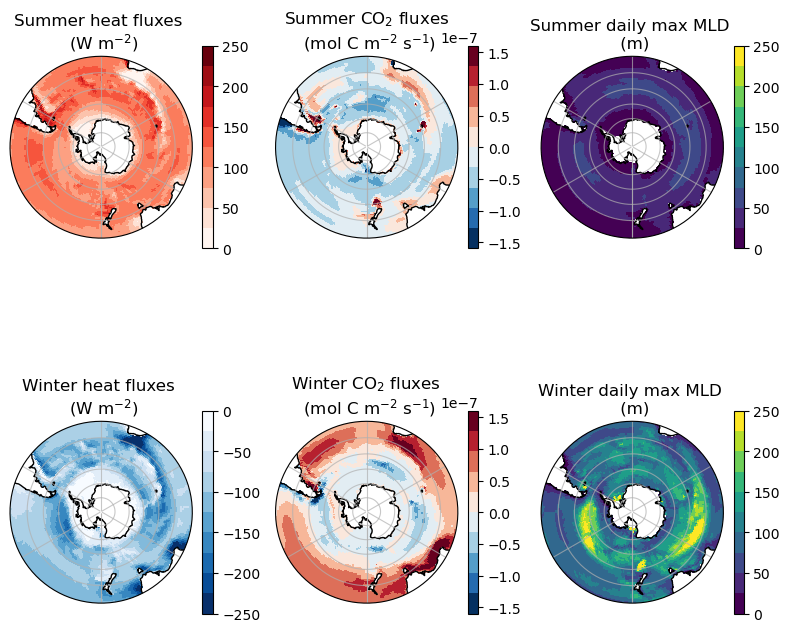

In [44]:
fig, axs = plt.subplots(figsize=(8, 8), nrows = 2, ncols = 3,
                        subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs = axs.flatten()

lim0 = [0, -1.6e-7, 0, -250, -1.6e-7, 0]
lim1 = [250, 1.6e-7, 250, 0, 1.6e-7, 250]
cmaps = [plt.get_cmap("Reds", 10), plt.get_cmap("RdBu_r", 10), plt.get_cmap("viridis", 10),
         plt.get_cmap("Blues_r", 10), plt.get_cmap("RdBu_r", 10), plt.get_cmap("viridis", 10)]

varnames_long = ["heat fluxes \n (W m$^{-2}$)", "CO$_2$ fluxes \n (mol C m$^{-2}$ s$^{-1}$)", "daily max MLD \n (m)"]
seas = ["Summer", "Winter"]

ds_atm = xr.open_dataset("/work/Katherine.Turner/tempest-extremes/odiv-251/data/atmos.0151010100-0155123123.slp.nc", use_cftime=True)
grid_area = om4labs.om4common.compute_area_regular_grid(ds_atm)

for i_v, v in enumerate(varnames):
    
    if v == "f_dic":
        v2 = "dic_stf_gas"
    elif v == "omldamax_regrid":
        v2 = "omldamax"
    else:
        v2 = v
    
    ds = xr.open_dataset(f'{path}/comp_{v}/clim_{v2}.nc', use_cftime=True)
#    SO_area_total = (ds[f"dailymean_{v2}"]*grid_area).sel(lat=slice(-90,-30)).sum(dim={"lat", "lon"})
    
    seasonal_means = ds[f'dailymean_{v2}'].groupby(ds.time.dt.season).mean()

#    SO_area_total.plot(ax=axs[i_v])
    
    for i in np.arange(2):
    
        ibox = (i)*3+i_v
    
        f = seasonal_means[i,:,:].plot(ax=axs[ibox], transform=ccrs.PlateCarree(), add_colorbar=False,
                                       vmin=lim0[ibox], 
                                       vmax=lim1[ibox],
                                       cmap=cmaps[ibox])
        axs[ibox].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
        axs[ibox].gridlines(alpha=0.7)
        axs[ibox].set_boundary(circle, transform=axs[ibox].transAxes)
        axs[ibox].coastlines()
        axs[ibox].set_title(f"{seas[i]} {varnames_long[i_v]}")
        plt.colorbar(f, ax=axs[ibox], aspect=20, fraction = .05)
plt.tight_layout()
plt.savefig('CM4_seasonal_climatology.png', format="png", dpi=100, bbox_inches="tight")